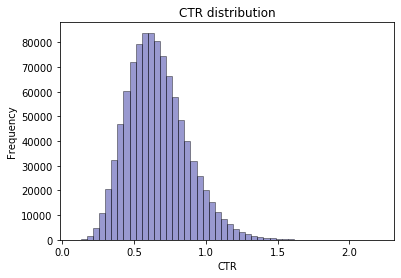

In [20]:
from scipy.stats import uniform
from scipy.stats import binom
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

trials = 100

#Change here1:
###
#display impressions/search queries
#if you use search quearies, remember to add probability of winning auction - it must redice number of queries.
#for example - from 10k to 8k when your ads is shown.
#here we take est. by Google Display Network impressions
volume = 1000000

#CTR

#NO PRIOR DATA
#Lower limit of CTR
#ctr_low = 0

#Higher limit of CTR
#ctr_high = 0.02

#uniform click distribution
#clicks_prob = uniform.rvs(ctr_low, ctr_high, size=volume)

#IF YOU HAVE PRIOR DATA
#in example avg CTR is about 0,6%, interval is from 0.2% to 1%
clicks_prob = np.random.beta(10, 1500, size=volume)

clicks_prob_percent = clicks_prob * 100
clicks_distr = sns.distplot(clicks_prob_percent, 
                            kde = False,
                            color = 'darkblue',
                            hist_kws={'edgecolor':'black'},)
plt.title('CTR distribution')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.show()

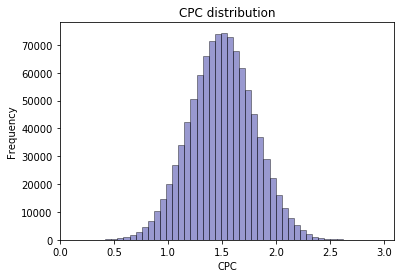

Median CPC is 1.5$


In [21]:
#dollars
cpc_low = 0.1
cpc_high = 2.5

#NO PRIOR DATA
#cpc_prob = uniform.rvs(cpc_low, cpc_high, size = volume)

#IF YOU HAVE PRIOR DATA
#in example avg CPC is about 5$, interval is from 2$ to 7$
# mean and standard deviation
mu, sigma = 1.5, 0.3
cpc_prob = np.random.normal(mu, sigma, size=volume)

cpc_distr = sns.distplot(cpc_prob, 
                          kde = False,  
                          color = 'darkblue',
                          hist_kws={'edgecolor':'black'},)
plt.title('CPC distribution')
plt.xlabel('CPC')
plt.ylabel('Frequency')
plt.show()

cpc_median = round(np.median(cpc_prob), 2)
print('Median CPC is ' + str(cpc_median) + '$')

In [22]:
#You can use this bootstrap function to calculate invervals of mean and use it for more accurate evaluation
#But it'll take time
def bootstrap(array):
    means = []
    x = 0
    for i in array:
        sample = np.random.choice(array, len(array))
        means.append(int(np.mean(sample)))
        print(x)
        x = x+1
    means = np.array(means)
    return means

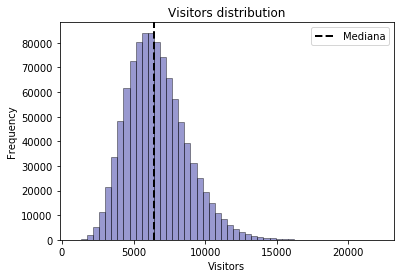

Median total costs - 9606.0$
Max total costs    - 33231.0$
Total costs inverval (95% probability) - 6476.41$ - 12735.59$


In [23]:
#Visitors
visitors = binom.rvs(volume, clicks_prob, size = volume)
#visitors = bootstrap(visitors)
visitors_distr = sns.distplot(visitors, 
                              kde = False, 
                              color = 'darkblue', 
                              hist_kws={'edgecolor':'black'})
plt.title('Visitors distribution')
plt.xlabel('Visitors')
plt.ylabel('Frequency')
plt.axvline(np.median(visitors), label = 'Mediana', color='k', linestyle='dashed', linewidth=2)
plt.legend()
#plt.text(1, 50, 'Median: {:.2f}'.format(np.median(visitors)))
plt.show()

visitors_costs = visitors * cpc_median
visitors_costs_median = round(np.median(visitors_costs), 2)
visitors_costs_max = round(np.max(visitors_costs), 2)
visitors_costs_std = round(np.std(visitors_costs), 2)
print("Median total costs - " + str(round(visitors_costs_median, 2)) + '$')
print("Max total costs " + "   - " + str(round(visitors_costs_max, 2)) + '$')
print("Total costs inverval (95% probability)" + " - " 
      + str(round(visitors_costs_median - visitors_costs_std, 2)) + '$' + ' - ' 
      + str(round(visitors_costs_median + visitors_costs_std, 2)) + '$')

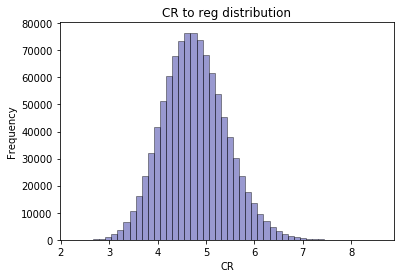

In [24]:
#Registrations
#NO PRIOR DATA
#Lower limit of CR to Reg
#cr_reg_low = 0
#Higher limit of CR to Reg
#cr_reg_high = 0.2
#CR to Registrations
#cr_reg_prob = uniform.rvs(cr_reg_low, cr_reg_high, size=volume)

#IF YOU HAVE PRIOR DATA
#in example avg CR to Registrations is 5%, interval is from 3% to 7%
cr_reg_prob = np.random.beta(50, 1000, size=volume)

cr_reg_prob_percent = cr_reg_prob * 100
cr_reg_distr = sns.distplot(cr_reg_prob_percent,
                            kde = False, 
                            color = 'darkblue', 
                            hist_kws={'edgecolor':'black'})
plt.title('CR to reg distribution')
plt.xlabel('CR')
plt.ylabel('Frequency')
plt.show()

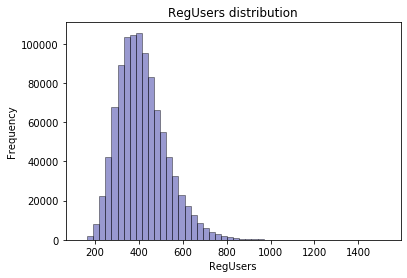

...
253 r_users: 0.14% (with costs interval 25.6$ - 50.34$; Medium is 37.97$)
254 r_users: 0.14% (with costs interval 25.5$ - 50.14$; Medium is 37.82$)
255 r_users: 0.14% (with costs interval 25.4$ - 49.94$; Medium is 37.67$)


...
367 r_users: 0.4% (with costs interval 17.65$ - 34.7$; Medium is 26.17$)
368 r_users: 0.39% (with costs interval 17.6$ - 34.61$; Medium is 26.1$)
369 r_users: 0.38% (with costs interval 17.55$ - 34.51$; Medium is 26.03$)
370 r_users: 0.38% (with costs interval 17.5$ - 34.42$; Medium is 25.96$)
371 r_users: 0.38% (with costs interval 17.46$ - 34.33$; Medium is 25.89$)


...
486 r_users: 0.24% (with costs interval 13.33$ - 26.2$; Medium is 19.77$)
487 r_users: 0.24% (with costs interval 13.3$ - 26.15$; Medium is 19.72$)
488 r_users: 0.23% (with costs interval 13.27$ - 26.1$; Medium is 19.68$)
489 r_users: 0.24% (with costs interval 13.24$ - 26.04$; Medium is 19.64$)
490 r_users: 0.23% (with costs interval 13.22$ - 25.99$; Medium is 19.6$)
491 r_users: 0.23% (with costs interval 13.19$ - 25.94$; Medium is 19.56$)


...
613 r_users: 0.07% (with costs interval 10.57$ - 20.78$; Medium is 15.67$)
614 r_users: 0.07% (with costs interval 10.55$ - 20.74$; Medium is 15.64$)
615 r_users: 0.07% (with costs interval 10.53$ - 20.71$; Medium is 15.62$)


...
723 r_users: 0.01% (with costs interval 8.96$ - 17.61$; Medium is 13.29$)
724 r_users: 0.02% (with costs interval 8.95$ - 17.59$; Medium is 13.27$)
725 r_users: 0.02% (with costs interval 8.93$ - 17.57$; Medium is 13.25$)
726 r_users: 0.02% (with costs interval 8.92$ - 17.54$; Medium is 13.23$)


...
835 r_users: 0.0% (with costs interval 7.76$ - 15.25$; Medium is 11.5$)
836 r_users: 0.0% (with costs interval 7.75$ - 15.23$; Medium is 11.49$)
837 r_users: 0.0% (with costs interval 7.74$ - 15.22$; Medium is 11.48$)
838 r_users: 0.0% (with costs interval 7.73$ - 15.2$; Medium is 11.46$)
839 r_users: 0.0% (with costs interval 7.72$ - 15.18$; Medium is 11.45$)


...
870 r_users: 0.0% (with costs interval 7.44$ - 14.64$; Medium is 11.04$)
871 r_users: 0.0% (with costs interval 7.44$ - 14.62$; Medium is 11.03$)
872 r_users: 0.0% (with costs interval 7.43$ - 14.61$; Medium is 11.02$)
873 r_users: 0.0% (with costs interval 7.42$ - 14.59$; Medium is 11.0$)
874 r_users: 0.0% (with costs interval 7.41$ - 14.57$; Medium is 10.99$)
...


1360 r_users: 0.0% (with costs interval 4.76$ - 9.36$; Medium is 7.06$)
1374 r_users: 0.0% (with costs interval 4.71$ - 9.27$; Medium is 6.99$)
1406 r_users: 0.0% (with costs interval 4.61$ - 9.06$; Medium is 6.83$)
1524 r_users: 0.0% (with costs interval 4.25$ - 8.36$; Medium is 6.3$)


In [25]:
#registrations
#remember, you can bootstrap it
r_users = binom.rvs(visitors, cr_reg_prob, trials)
r_users_distr = sns.distplot(r_users,
                             kde = False, 
                             color = 'darkblue', 
                             hist_kws={'edgecolor':'black'})
plt.title('RegUsers distribution')
plt.xlabel('RegUsers')
plt.ylabel('Frequency')
plt.show()


r_users_list = r_users.tolist()
r_users_count = set(r_users_list)
for i in r_users_count:
    elements_count = r_users_list.count(i)
    probability = float(elements_count)/float(len(r_users_list))
    if i != 0:
        if i == 1:
            print('Maximum CPL with 95$ probability is ' + str(round((visitors_costs_median + visitors_costs_std)/i, 2))
                  + '$')
            print(str(i) + ' r_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$' 
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
        else:
            print(str(i) + ' r_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$'
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
    else:
        print(str(i) + ' r_users' + ': ' + str(round(probability*100, 2)) + '%')

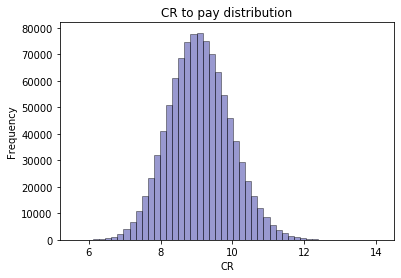

In [26]:
#Payments

#NO PRIOR DATA
#Lower limit of CR to Payment
#cr_pay_low = 0.1
#Higher limit of CR to Payment
#cr_pay_high = 0.2

#cr_pay_prob = uniform.rvs(cr_pay_low, cr_pay_high, size=volume)

#IF YOU HAVE PRIOR DATA
#in example avg CR to Payments is 9%, interval is from 6% to 12%
cr_pay_prob = np.random.beta(100, 1000, size=volume)

cr_pay_prob_percent = cr_pay_prob * 100
cr_pay_distr = sns.distplot(cr_pay_prob_percent,
                            kde = False, 
                            color = 'darkblue', 
                            hist_kws={'edgecolor':'black'})
plt.title('CR to pay distribution')
plt.xlabel('CR')
plt.ylabel('Frequency')
plt.show()

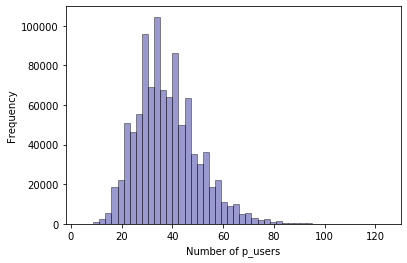

...19 p_users: 1.0% (with costs interval 340.87$ - 670.76$; Medium is 505.82$)
20 p_users: 1.2% (with costs interval 323.83$ - 637.22$; Medium is 480.52$)
21 p_users: 1.46% (with costs interval 308.41$ - 606.88$; Medium is 457.64$)
22 p_users: 1.68% (with costs interval 294.39$ - 579.29$; Medium is 436.84$)
23 p_users: 1.96% (with costs interval 281.59$ - 554.11$; Medium is 417.85$)
24 p_users: 2.22% (with costs interval 269.86$ - 531.02$; Medium is 400.44$)
25 p_users: 2.43% (with costs interval 259.06$ - 509.78$; Medium is 384.42$)
26 p_users: 2.67% (with costs interval 249.1$ - 490.17$; Medium is 369.63$)
27 p_users: 2.85% (with costs interval 239.87$ - 472.02$; Medium is 355.94$)
28 p_users: 3.06% (with costs interval 231.31$ - 455.16$; Medium is 343.23$)
29 p_users: 3.2% (with costs interval 223.33$ - 439.46$; Medium is 331.4$)
30 p_users: 3.33% (with costs interval 215.89$ - 424.81$; Medium is 320.35$)
31 p_users: 3.44% (with costs interval 208.92$ - 411.11$; Medium is 310.02$)
3

In [21]:
#payments
#remember, you can bootstrap it
p_users = binom.rvs(r_users, cr_pay_prob)
p_users_distr = sns.distplot(p_users,
                             kde = False, 
                             color = 'darkblue', 
                             hist_kws={'edgecolor':'black'} )
#use it, if number of p_users is really low - 0, 1, 2, 3 on x-label
#plt.xticks(range(np.min(p_users), np.max(p_users) + 1))
plt.ylabel('Frequency')
plt.xlabel('Number of p_users')
plt.show()

p_users_list = p_users.tolist()
p_users_count = set(p_users_list)
for i in p_users_count:
    elements_count = p_users_list.count(i)
    probability = float(elements_count)/float(len(p_users_list))
    if i != 0:
        if i == 1:
            print('Maximum CAC with 95$ probability is ' + str(round((visitors_costs_median + visitors_costs_std)/i, 2))
                  + '$')
            print(str(i) + ' p_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$' 
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
        else:
            print(str(i) + ' p_users' + ': ' + str(round(probability*100, 2)) + '%' 
                  + ' (with costs interval ' 
                  + str(round((visitors_costs_median - visitors_costs_std)/i, 2)) + '$' + ' - '
                  + str(round((visitors_costs_median + visitors_costs_std)/i, 2)) + '$'
                  + '; Medium is ' + str(round((visitors_costs_median)/i, 2)) + '$)')
    else:
        print(str(i) + ' p_users' + ': ' + str(round(probability*100, 2)) + '%')